## Tobigs 2주차 Logistic Regression 과제
#### 15기 이윤정

---
1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 어떤 성능지표를 기준으로 성능을 개선을 시도했고, 그러한 선택의 이유를 적어주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
credit = pd.read_csv("assignment3_creditcard.csv")

In [3]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


### 1. 데이터 확인

In [4]:
credit.shape

(28678, 29)

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [6]:
credit.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [7]:
credit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


- 독립변수 간 범위 차이가 매우 크므로 scaling이 필요하다. 이때, 몇몇 변수의 경우 최솟값과 최댓값의 간의 간극이 크기때문에 minmaxscaler보단 standardscaler가 적당하다.  
- class 변수(종속변수)를 보면 전체 데이터 중 75%까지 모두 0인 것을 볼 수 있다. 자세한 분포를 위해 plot을 찍어보도록 하자.

#### scaling

In [8]:
X = credit.drop(['Class'],axis=1)
y = credit['Class']

In [9]:
#standardscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stand = pd.DataFrame(scaler.fit_transform(X))
stand

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.902180,1.442462,0.242076,0.682170,-0.545636,1.897453,-3.087657,-7.481774,-1.310739,-1.750813,...,0.184394,3.586292,-6.258702,1.163043,0.721013,-0.838813,1.973207,-1.295843,-0.047097,0.941755
1,1.027442,-0.328926,-0.795394,-0.395393,0.029429,-0.432294,0.005620,-0.185605,1.049741,-0.240491,...,0.770828,-0.110982,0.038445,0.528470,0.078108,0.993348,0.194594,2.026379,-0.237219,-0.226298
2,-1.461907,-1.733201,0.705348,-0.027248,-0.751404,-0.194335,0.415558,0.461429,0.403048,-1.409372,...,-1.078858,1.864714,0.429058,-0.520817,2.025422,0.676446,0.019311,1.577217,-0.755467,-1.029430
3,-0.720659,0.921458,0.191638,0.540317,-0.333272,-0.533410,0.368140,0.395090,-0.672139,0.292162,...,0.793099,0.049651,0.125696,0.549344,-0.188079,0.898622,-0.414465,-0.857327,0.065929,-0.511850
4,-0.131203,-0.224824,-1.203698,-0.599739,0.094078,-1.105548,1.362418,-0.622372,-1.085267,0.894765,...,-0.651400,-1.219154,-0.017103,1.373663,-0.036971,0.129301,-2.831946,1.555181,1.248615,1.110322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,1.023255,-0.023908,-0.566583,0.251205,-0.024285,-0.892442,0.202475,-0.286709,0.376723,0.071062,...,0.156931,-0.239323,-0.341422,-0.845179,0.566116,0.117848,-0.517101,0.399455,-0.165871,-0.200830
28674,0.630217,-0.793406,0.924346,-0.163191,-1.294682,0.410528,-1.177492,0.340326,0.900087,0.251606,...,0.769189,-0.177753,0.158912,0.972702,-0.056755,0.173374,0.662386,-0.018687,0.223756,0.061716
28675,1.027863,0.084394,-0.974700,0.230460,0.397149,-0.572397,0.204807,-0.205689,0.352270,-0.290601,...,0.117016,-0.120511,-0.438509,-1.230805,0.520796,0.666969,-0.406308,0.369172,-0.150879,-0.103022
28676,-0.332365,0.797334,0.878293,1.357837,0.732640,0.508122,0.623108,-0.346918,-0.584673,1.218846,...,0.060428,0.039199,0.118811,0.613586,-0.590491,-1.276522,-0.688309,0.210966,-2.140772,-1.059996


In [10]:
data = pd.concat([X,y],axis=1)

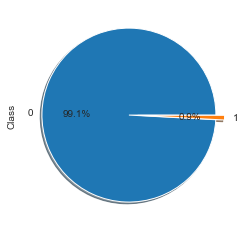

In [11]:
#class 변수 분포 확인
data['Class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

정상거래와 이상거래 건의 비율이 매우 **불균등**하다.  
이러한 경우, 모든 데이터가 정상거래라고 가정 후 모델 적합을 하여도 정확도가 매우 높게 나올 것이다.

---
### Logistic Regression 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
#전체 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)  #train : test = 7 : 3으로 분리 (seed = 0)

In [14]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20074, 28) (8604, 28) (20074,) (8604,)


In [15]:
# Logistic Regression 
classifier = LogisticRegression()
pre_score = classifier.fit(x_train, y_train.values.ravel())

In [16]:
# class 예측
y_pred = classifier.predict(x_test.values)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
# [0으로 분류될 확률, 1로 분류될 확률]
classifier.predict_proba(x_test)

array([[9.99424309e-01, 5.75690862e-04],
       [9.99713727e-01, 2.86272593e-04],
       [9.80934400e-01, 1.90656000e-02],
       ...,
       [9.99883190e-01, 1.16809782e-04],
       [9.98003972e-01, 1.99602794e-03],
       [9.99686429e-01, 3.13570578e-04]])

---
### 평가 지표

In [18]:
from sklearn import metrics
from sklearn.metrics import*

In [19]:
# mean accuracy 
classifier.score(x_test, y_test)

0.9977917247791724

In [20]:
print("F1-socre : ",f1_score(y_test, y_pred))

F1-socre :  0.8429752066115702


In [21]:
# confusin matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
confusion_matrix(y_test, y_pred)

array([[8534,    6],
       [  13,   51]], dtype=int64)

In [22]:
print("accuracy : ",(tp+tn)/(tp+tn+fp+fn))
print("precision : ",tp/(tp+fp))
print("recall : ",tp/(tp+fn))
print("specificity : ",tn/(fp+tn))

accuracy :  0.9977917247791724
precision :  0.8947368421052632
recall :  0.796875
specificity :  0.9992974238875878


- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)

In [23]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8547
           1       0.80      0.89      0.84        57

    accuracy                           1.00      8604
   macro avg       0.90      0.95      0.92      8604
weighted avg       1.00      1.00      1.00      8604



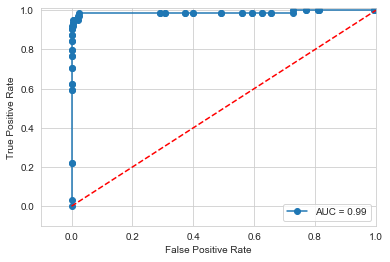

In [24]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, classifier.decision_function(x_test))
roc_auc = auc(fpr, tpr)

#plot ROC
plt.plot(fpr, tpr, 'o-',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
roc_auc

0.9874451112412178

---

본 데이터는 정상 거래와 이상 거래 간의 데이터 적합이 **불균등**하며, 실제로 예측하고자하는 지표는 **이상 거래**이기 때문에 Negative(정상거래)의 비율이 너무 높다. 이러한 경우, accuaracy만으로는 희박한 가능성으로 발생할 상황에 대해 제대로 분류를 해주는 지 알 수 없으므로 precision과 recall 지표가 중요하다. 

---

> 1. Precision : True라고 분류한 것 중 실제 True인 것의 비율로 1에 가까울 수록 성능이 좋다.  

> 2. Recall : 실제 True인 것 중 모델이 True라고 예측한 것의 비율로 1에 가까울 수록 성능이 좋다.  

    단, 이 두 지표는 반비례하는 경향이 있다.  
    
>F1 score : Precision과 Recall의 조화평균으로 두 지표를 모두 균형있게 반영한다.

---

전반적으로 모델 성능에 대한 평가 지표 값들이 매우 높다. 하지만, 분석에 사용된 데이터는 매우 불균등하며 예측하고자 하는 데이터의 수가 너무 적기 때문에 Precision과 Recall을 기준으로 모델을 개선하고자 한다.  
이때, 데이터의 불균등을 해결하기 위해 Resampling을 진행하였다.

---
### resampling

In [26]:
abnormal_len = len(data[data['Class']== 1]) #부정 거래 횟수 - 246
abnormal = np.array(data[data['Class']== 1].index) #부정 거래 데이터

normal_len = len(data[data['Class'] != 1])  #정상 거래 횟수
normal = data[data['Class'] != 1].index  #정상 거래 데이터

In [27]:
normal_rand = np.random.choice(normal, abnormal_len, replace = False)  #정상 거래 데이터에서 부정 거래 데이터 개수(246)만큼 임의표본 추출
normal_rand = np.array(normal_rand)

resample = np.concatenate([abnormal, normal_rand])  #부정 거래와 정상 거래 데이터 추합

sample = data.iloc[resample, :]  #data에서 resample에 해당되는 index만 추출

x_sample = sample.iloc[:, sample.columns != 'Class']  #재추출된 데이터에서 독립변수만
y_sample = sample.iloc[:, sample.columns == 'Class']  #재추출된 데이터에서 종속변수만

print("정상거래율 : ", len(sample[sample['Class'] ==  0])/len(sample))   #재추출 후 정상 거래 비율
print("이상거래율 : ", len(sample[sample['Class'] == 1])/len(sample))  #재추출 후 부정 거래 비율
print("총거래율 : ", len(sample))  #총 거래 수

정상거래율 :  0.5
이상거래율 :  0.5
총거래율 :  492


이상 거래 데이터를 기준으로 재추출된 데이터는 정상거래와 이상거래의 비율이 5:5인 것을 확인할 수 있다

### Logistic Regression - resampling

In [28]:
#sampling 데이터 분할
x_sample_train, x_sample_test, y_sample_train, y_sample_test = train_test_split(x_sample, y_sample, test_size = 0.3, random_state = 0)  #train : test = 7 : 3으로 분리 (seed = 0)

In [29]:
print(x_sample_train.shape, x_sample_test.shape, y_sample_train.shape, y_sample_test.shape)

(344, 28) (148, 28) (344, 1) (148, 1)


In [30]:
# Logistic Regression 
lr = LogisticRegression()
pre_score = lr.fit(x_sample_train, y_sample_train.values.ravel())

In [31]:
# class 예측
y_sample_pred = lr.predict(x_sample_test.values)
y_sample_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [32]:
# [0으로 분류될 확률, 1로 분류될 확률]
lr.predict_proba(x_sample_test)

array([[3.34303257e-01, 6.65696743e-01],
       [5.41615774e-09, 9.99999995e-01],
       [9.53425034e-01, 4.65749661e-02],
       [0.00000000e+00, 1.00000000e+00],
       [3.46938490e-07, 9.99999653e-01],
       [8.33482453e-01, 1.66517547e-01],
       [1.72325134e-02, 9.82767487e-01],
       [9.99993671e-01, 6.32880794e-06],
       [1.02237232e-04, 9.99897763e-01],
       [9.90825847e-01, 9.17415315e-03],
       [9.97455852e-01, 2.54414765e-03],
       [9.98855032e-01, 1.14496769e-03],
       [4.57051581e-04, 9.99542948e-01],
       [1.16423104e-06, 9.99998836e-01],
       [5.67101744e-04, 9.99432898e-01],
       [9.84164339e-01, 1.58356610e-02],
       [9.99603488e-01, 3.96511754e-04],
       [9.87536992e-01, 1.24630084e-02],
       [1.55213981e-06, 9.99998448e-01],
       [9.99115535e-01, 8.84464927e-04],
       [9.37059599e-01, 6.29404013e-02],
       [2.09484825e-07, 9.99999791e-01],
       [4.81996665e-11, 1.00000000e+00],
       [8.20327085e-01, 1.79672915e-01],
       [9.635700

### 평가 지표 - resampling

In [33]:
# mean accuracy 
lr.score(x_sample_test, y_sample_test)

0.9256756756756757

In [34]:
print("F1-socre : ",f1_score(y_sample_test, y_sample_pred))

F1-socre :  0.9251700680272109


In [35]:
# confusin matrix
tn, fp, fn, tp = confusion_matrix(y_sample_test, y_sample_pred).ravel()
confusion_matrix(y_sample_test, y_sample_pred)

array([[69,  3],
       [ 8, 68]], dtype=int64)

In [36]:
print("accuracy : ",(tp+tn)/(tp+tn+fp+fn))
print("precision : ",tp/(tp+fp))
print("recall : ",tp/(tp+fn))
print("specificity : ",tn/(fp+tn))

accuracy :  0.9256756756756757
precision :  0.9577464788732394
recall :  0.8947368421052632
specificity :  0.9583333333333334


In [37]:
print(classification_report(y_sample_pred,y_sample_test))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        77
           1       0.89      0.96      0.93        71

    accuracy                           0.93       148
   macro avg       0.93      0.93      0.93       148
weighted avg       0.93      0.93      0.93       148



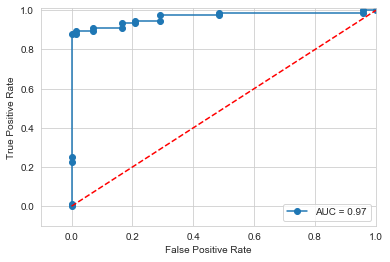

In [38]:
fpr, tpr, thresholds = roc_curve(y_sample_test, lr.decision_function(x_sample_test))
roc_auc = auc(fpr, tpr)

#plot ROC
plt.plot(fpr, tpr, 'o-',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
roc_auc

0.9650950292397661

재추출한 데이터를 통해 로지스틱 회귀분석을 진행한 결과, accuracy와 specificity 값은 하락하였으나 Precision, Recall, F1-score가 상승한 것을 확인할 수 있다. 